In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [3]:
fcounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
flau = pd.read_csv(r"E:\netData\MAG-nobel\Nobel laureates.csv")
Nobelpapers = pd.read_csv("E:/netData/Nobel winners/Prize-winning paper record.csv")

In [4]:
flau['Is paired'] = flau['Laureate name'].map(dict(zip(fcounter['Laureate name'].unique() , [1]*361)))
flau.fillna(0 , inplace = True)

In [5]:
fflau = flau[flau['Is paired']==1]
fflau['Pub year']=fflau['Laureate name'].map(Nobelpapers.drop_duplicates(subset = 'Laureate name').set_index('Laureate name')['Pub year'])

In [7]:
ff = fflau[['pub num','total cit', 'h', 'g','max cit','max2','max3','max4','max5']]
ff.columns = ['Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr']
lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation

kendall_matrix1 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

In [8]:
col_name=ff.columns.values#获取列名
mask=np.zeros_like(kendall_matrix1)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True
#若要保留下三角，只需将mask[i][j]=True改成mask[j][i]=True
spearman_matrix1=pd.DataFrame(kendall_matrix1,index=col_name,columns=col_name)#矩阵

In [13]:
ff = fcounter[['pub num','total cit', 'h', 'g','max cit','max2','max3','max4','max5']]
ff.columns = ['Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr']
ff.dropna(inplace = True)
lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation

kendall_matrix2 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

In [14]:
col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix2)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True
spearman_matrix2=pd.DataFrame(kendall_matrix2,index=col_name,columns=col_name)#矩阵

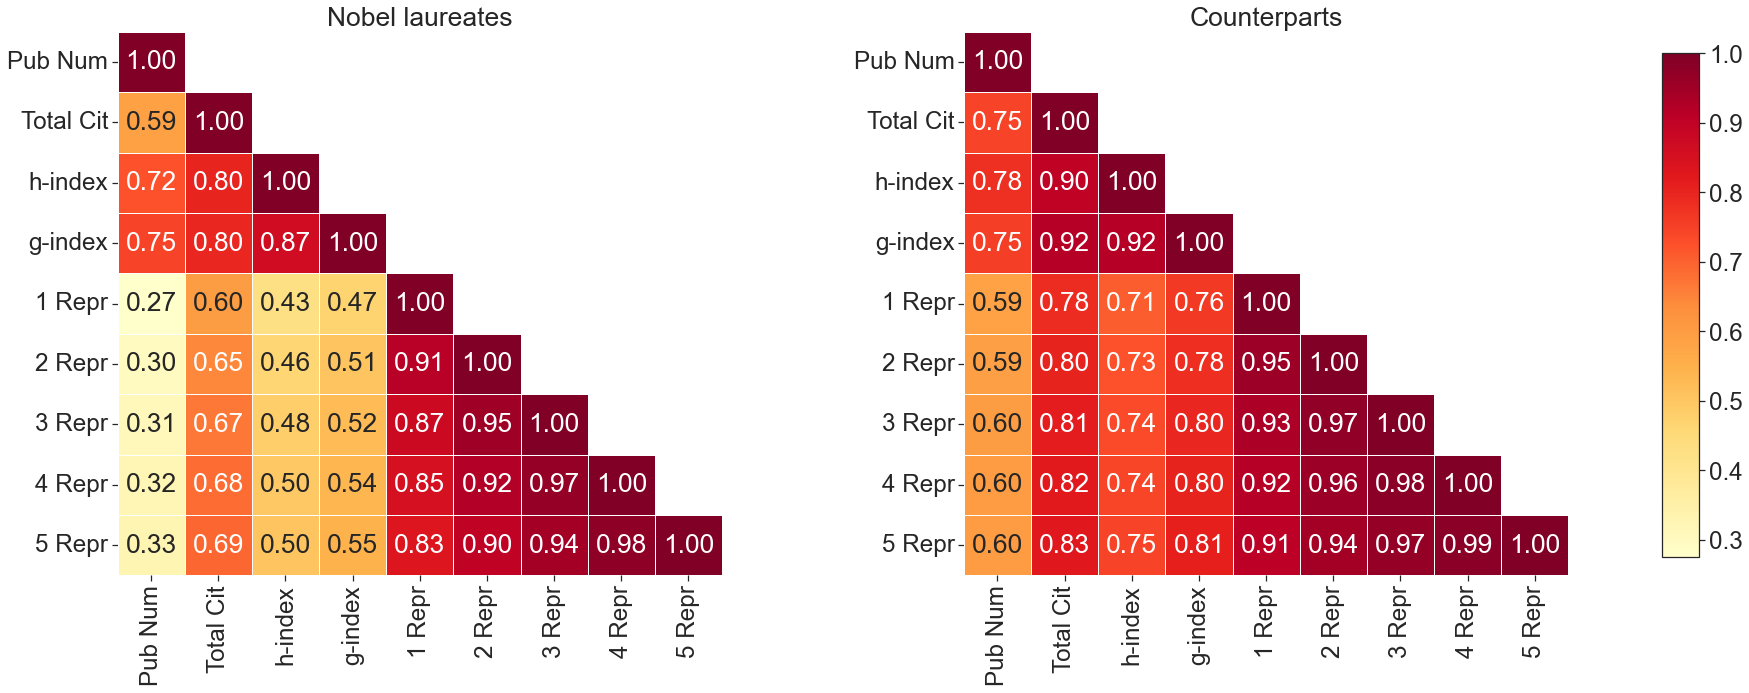

In [15]:
plt.rcParams['font.sans-serif'] = ['Arial'] 
# assuming kendall_matrix1 and kendall_matrix2 are numpy arrays containing the correlation values
vmin = np.min([np.min(kendall_matrix1), np.min(kendall_matrix2)])
vmax = np.max([np.max(kendall_matrix1), np.max(kendall_matrix2)])

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(26, 10))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.40,hspace=0)
sns.set(context='notebook', style='ticks', font_scale=2.2)

# plot heatmap 1 in the first subplot
sns.heatmap(kendall_matrix1, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[0], cbar=False)
axs[0].set_title('Nobel laureates')

# plot heatmap 2 in the second subplot without color bar
sns.heatmap(kendall_matrix2, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[1], cbar=False)
axs[1].set_title('Counterparts')

# add a shared color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].collections[0], cax=cbar_ax)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 4\1.pdf",bbox_inches = 'tight')